In [19]:
%load_ext autoreload
%autoreload 2

import json
import pandas as pd
import seaborn as sns

sns.set()

from importlib.resources import files

DATA_DIR = files("biobank_olink.data")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from itertools import chain

results = [json.load(p.open()) for p in (DATA_DIR / "results").iterdir() if
           p.name.startswith('two_extremes_exp')]
results = pd.DataFrame(chain.from_iterable(results))
results

,auc_score,learning_rate,n_estimators,max_depth,min_child_weight,subsample,colsample_bytree,colsample_bylevel,colsample_bynode,gamma,...,inner_splits,n_trials,optuna_n_workers,num_gpus,seed,study_name,feat_importance,exp_type,y_test,y_proba
0,0.800524,0.017620,1881,4,10,0.342886,0.792910,0.684067,0.635783,1.410117,...,5,100,1,8,42,two_extremes_exp_sbp_th0.35_nan_remove_corr_ig...,"{'ACY1': 0.0028325922321528196, 'ERBB2': 0.002...",NaN,NaN,NaN
1,0.809461,0.034799,2000,3,8,0.713941,0.477220,0.676861,0.484628,3.032847,...,5,100,1,8,42,two_extremes_exp_sbp_th0.35_nan_remove_corr_ig...,"{'ERBB2': 0.003207206493243575, 'IL1R2': 0.002...",NaN,NaN,NaN
2,0.802329,0.045651,1726,2,3,0.410506,0.702073,0.981524,0.539808,3.838577,...,5,100,1,8,42,two_extremes_exp_sbp_th0.35_nan_remove_corr_ig...,"{'ERBB2': 0.00311840046197176, 'ACY1': 0.00279...",NaN,NaN,NaN
3,0.792024,0.034820,1723,3,18,0.683438,0.641167,0.262548,0.805813,1.517563,...,5,100,1,8,42,two_extremes_exp_sbp_th0.35_nan_remove_corr_ig...,"{'ERBB2': 0.003437293926253915, 'ERBB3': 0.003...",NaN,NaN,NaN
4,0.810232,0.038071,1625,3,18,0.621316,0.415702,0.912701,0.547059,1.110242,...,5,100,1,8,42,two_extremes_exp_sbp_th0.35_nan_remove_corr_ig...,"{'ERBB2': 0.0035992837511003017, 'ACY1': 0.003...",NaN,NaN,NaN
5,0.802212,0.040004,1931,2,14,0.456802,0.792341,0.573024,0.599646,6.876193,...,5,100,1,8,42,two_extremes_exp_sbp_th0.35_nan_ignore_corr_dr...,"{'ACY1': 0.0034462399780750275, 'MME': 0.00310...",NaN,NaN,NaN
6,0.800046,0.016846,1939,5,18,0.460557,0.952461,0.912215,0.237589,0.026845,...,5,100,1,8,42,two_extremes_exp_sbp_th0.35_nan_ignore_corr_dr...,"{'REN': 0.002530044876039028, 'ERBB2': 0.00237...",NaN,NaN,NaN
7,0.789975,0.022747,2000,3,8,0.435023,0.796488,0.905048,0.372439,1.319777,...,5,100,1,8,42,two_extremes_exp_sbp_th0.35_nan_ignore_corr_dr...,"{'ERBB2': 0.0023274747654795647, 'GGT1': 0.002...",NaN,NaN,NaN
8,0.797427,0.037556,1674,2,14,0.558305,0.762818,0.885351,0.449748,2.433559,...,5,100,1,8,42,two_extremes_exp_sbp_th0.35_nan_ignore_corr_dr...,"{'IL1R2': 0.004872176796197891, 'ERBB2': 0.004...",NaN,NaN,NaN
9,0.798845,0.125097,1837,1,19,0.675048,0.761054,0.616416,0.664589,0.639475,...,5,100,1,8,42,two_extremes_exp_sbp_th0.35_nan_ignore_corr_dr...,"{'ERBB3': 0.0184722188860178, 'CPM': 0.0151787...",NaN,NaN,NaN


In [21]:
results.groupby(["target", "nan_handling", "corr_handling"]).auc_score.mean()

target  nan_handling  corr_handling
DBP     remove        drop             0.792996
PP      remove        drop             0.721607
PP2     remove        drop             0.641278
SBP     ignore        drop             0.797701
        remove        drop             0.802722
                      ignore           0.802914
Name: auc_score, dtype: float64

In [13]:
one_case = results.loc[(results.target == "SBP") & (results.nan_handling == "remove") & (
        results.corr_handling == "drop")]
one_case

,auc_score,learning_rate,n_estimators,max_depth,min_child_weight,subsample,colsample_bytree,colsample_bylevel,colsample_bynode,gamma,...,inner_splits,n_trials,optuna_n_workers,num_gpus,seed,study_name,feat_importance,exp_type,y_test,y_proba
15,0.813020,0.074169,1710,2,6,0.644642,0.798123,0.205155,0.541648,1.292608,...,5,500,8,8,42,two_extremes_exp_sbp_th0.35_nan_remove_corr_dr...,"{'AARSD1': 0.0, 'ABHD14B': 0.00091254938161000...",NaN,"[True, True, True, False, True, True, False, T...","[0.43671759963035583, 0.15768662095069885, 0.3..."
16,0.798048,0.044579,1937,3,15,0.590139,0.531422,0.370873,0.484328,2.759413,...,5,500,8,8,42,two_extremes_exp_sbp_th0.35_nan_remove_corr_dr...,"{'AARSD1': 0.000569154042750597, 'ABHD14B': 0....",NaN,"[False, True, False, False, True, False, False...","[0.6545376181602478, 0.7507565021514893, 0.833..."
17,0.801220,0.047056,1714,3,16,0.590572,0.815101,0.576058,0.564167,3.402303,...,5,500,8,8,42,two_extremes_exp_sbp_th0.35_nan_remove_corr_dr...,"{'AARSD1': 0.0005493700737133622, 'ABHD14B': 0...",NaN,"[True, False, True, True, True, False, False, ...","[0.8773303031921387, 0.5544993281364441, 0.574..."
18,0.809693,0.035522,2000,3,16,0.602422,0.585196,0.953042,0.429090,3.271057,...,5,500,8,8,42,two_extremes_exp_sbp_th0.35_nan_remove_corr_dr...,"{'AARSD1': 0.0004924776148982346, 'ABHD14B': 0...",NaN,"[False, False, False, True, False, True, True,...","[0.47280189394950867, 0.8802347183227539, 0.20..."
19,0.791632,0.063960,1763,2,13,0.667205,0.315868,0.282000,0.518415,0.862512,...,5,500,8,8,42,two_extremes_exp_sbp_th0.35_nan_remove_corr_dr...,"{'AARSD1': 0.0004956230986863375, 'ABHD14B': 0...",NaN,"[False, True, True, True, False, True, False, ...","[0.11654219031333923, 0.758145809173584, 0.742..."


In [14]:
one_case.auc_score.mean()

0.8027223999404345

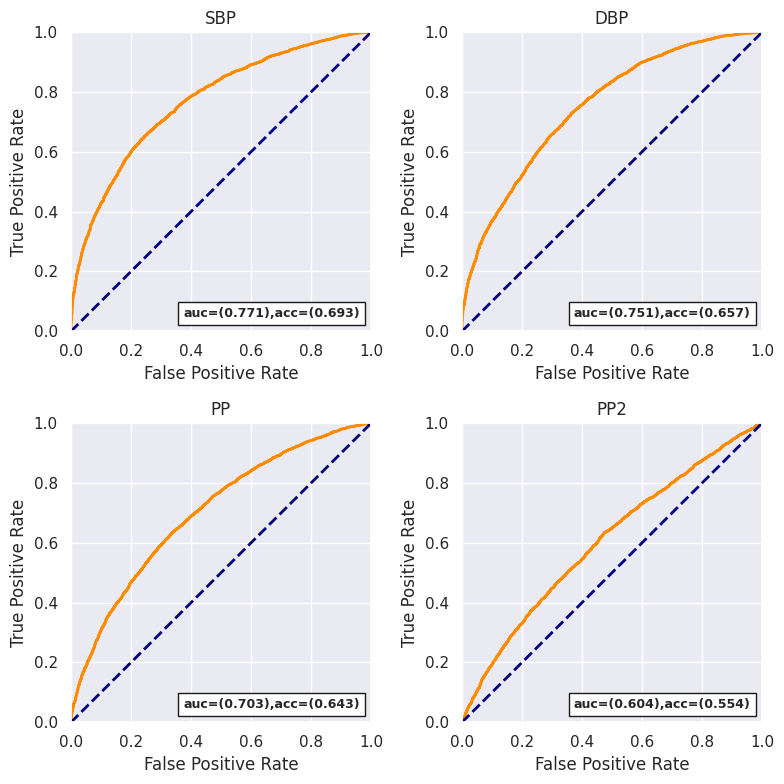

In [23]:
from matplotlib.offsetbox import AnchoredText
from sklearn.metrics import roc_curve, auc, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

targets = ["SBP", "DBP", "PP", "PP2"]

plt.figure(figsize=(8, 8))
for i, target in enumerate(targets):
    plt.subplot(2, 2, i + 1)
    one_case = results.loc[
        (results.target == target) & (results.nan_handling == "remove") & (results.corr_handling == "drop")
    ]
    y_test, y_prob = one_case["y_test"].values, one_case["y_proba"].values
    y_test, y_prob = np.concatenate(y_test), np.concatenate(y_prob)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    acc_score = accuracy_score(y_test, y_prob > 0.5)

    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0, 1.0])
    plt.ylim([0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(target)
    ax = plt.gca()

    anc = AnchoredText(f"auc=({roc_auc:.3f}),acc=({acc_score:.3f})",
                       loc="lower right", frameon=True, prop=dict(size=9, fontweight="bold"))
    ax.add_artist(anc)

plt.tight_layout()
plt.show()

In [44]:
feat_imps = one_case.feat_importance
feat_imps = pd.DataFrame(list(feat_imps.values)).T.sort_values(0, ascending=False)
feat_imps.rank(ascending=False).astype(int)

,0,1,2,3,4
NTproBNP,1,1,2,1,1
TAFA5,2,3,3,9,2
NOTCH3,3,523,374,150,402
CXCL9,4,5,4,21,53
PTPRN2,5,17,6,3,11
...,...,...,...,...,...
MAVS,1344,1232,527,449,30
IGFBP2,1344,1023,551,1250,306
CLTA,1344,147,52,488,298
CLIP2,1344,221,390,1279,810


In [43]:
res_of_interest = results.loc[(results.nan_handling == "remove") & (results.corr_handling == "drop")]
feat_imps = res_of_interest.groupby("target").feat_importance\
    .apply(lambda x: pd.DataFrame(x.values.tolist())\
    .T\
    .mean(axis=1).sort_values(ascending=False))\
    .unstack("target")\
    .sort_values("SBP", ascending=False)\
    .rank(ascending=False)
feat_imps[targets].astype(int)

target,SBP,DBP,PP,PP2
ERBB2,1,2,26,1207
REN,2,1,1,1016
ERBB3,3,3,740,959
MEGF9,4,6,60,1143
LAMP2,5,42,39,1138
...,...,...,...,...
ITGB5,1350,786,1301,206
LAT,1351,394,764,65
FXYD5,1352,1074,1299,1046
CRELD2,1353,395,1278,537


<Axes: xlabel='target', ylabel='auc_score'>

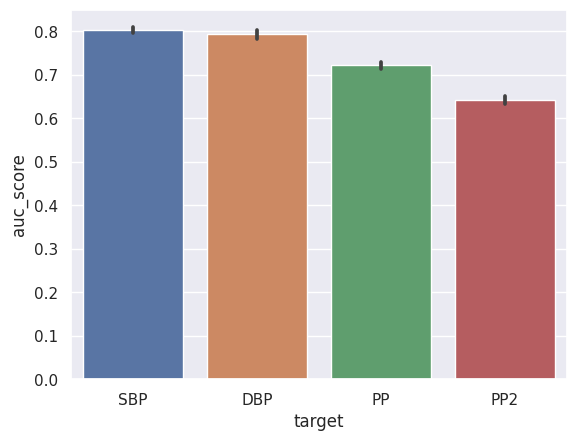

In [36]:
sns.barplot(data=res_of_interest, x="target", y="auc_score",
            order=targets)

In [18]:
# check whether any of the top features correlates with those we removed